## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset on Mouse ID column
combined_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
# According to mouse_metadata, there are 249 different mice, so this length matches the combined table
combined_study_data["Mouse ID"].value_counts()

g989    13
a963    10
n304    10
j984    10
w422    10
        ..
o848     1
u153     1
l872     1
x336     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_study_data[combined_study_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = "g989"
dup_mouse_df = combined_study_data.loc[combined_study_data["Mouse ID"] == dup_mouse]
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = combined_study_data[combined_study_data["Mouse ID"] != "g989"]
clean_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame. New length is 248, which is correct (subtracted 1 from 249 original)
clean_study_data["Mouse ID"].value_counts()

a963    10
y163    10
s185    10
j984    10
w422    10
        ..
o848     1
t573     1
b447     1
l872     1
v199     1
Name: Mouse ID, Length: 248, dtype: int64

In [7]:
clean_study_data["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

capomulin = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Capomulin"]
capomulin_vol = capomulin["Tumor Volume (mm3)"]
capomulin_mean = np.mean(capomulin_vol)
capomulin_median = np.median(capomulin_vol)
capomulin_var = np.var(capomulin_vol)
capomulin_std = np.std(capomulin_vol)
capomulin_sem = st.sem(capomulin_vol)
print(f"Capomulin Mean = {capomulin_mean}")
print(f"Capomulin Median = {capomulin_median}")
print(f"Capomulin Variance = {capomulin_var}")
print(f"Capomulin Standard Deviation = {capomulin_std}")
print(f"Capomulin Standard Error (SEM) = {capomulin_sem}")

Capomulin Mean = 40.67574114100001
Capomulin Median = 41.557808879999996
Capomulin Variance = 24.839295580601572
Capomulin Standard Deviation = 4.9839036488079875
Capomulin Standard Error (SEM) = 0.32934562340083096


In [24]:
# Check max and min to get a good idea if variance makes sense
capomulin_min = capomulin["Tumor Volume (mm3)"].min()
capomulin_max = capomulin["Tumor Volume (mm3)"].max()
capomulin_num = len(capomulin)
print(f"Capomulin Min = {capomulin_min}")
print(f"Capomulin Max = {capomulin_max}")
print(f"Total Capomulin data points = {capomulin_num}")
print(capomulin_vol.sort_values())

Capomulin Min = 23.34359787
Capomulin Max = 48.15820939
Total Capomulin data points = 230
19     23.343598
18     25.472143
28     28.167397
17     28.328531
39     28.430964
         ...    
384    47.373423
374    47.488599
440    47.685963
375    48.070452
332    48.158209
Name: Tumor Volume (mm3), Length: 230, dtype: float64


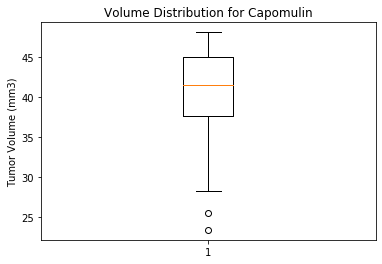

In [26]:
# Check with box and whisker plot to make sure
fig, ax = plt.subplots()
ax.set_title("Volume Distribution for Capomulin")
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(capomulin_vol)
plt.show()

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
grp_regimens = clean_study_data.groupby(["Drug Regimen"]).mean()
grp_regimens.reset_index()
grp_regimens = grp_regimens[["Tumor Volume (mm3)"]]
grp_regimens = grp_regimens.rename(columns={"Tumor Volume (mm3)":"Mean"})

grp_median = clean_study_data.groupby(["Drug Regimen"]).median()
grp_median.reset_index()
grp_median = grp_median[["Tumor Volume (mm3)"]]
grp_regimens = grp_regimens.merge(grp_median, on="Drug Regimen")
grp_regimens = grp_regimens.rename(columns={"Tumor Volume (mm3)":"Median"})

grp_var = clean_study_data.groupby(["Drug Regimen"]).var()
grp_var.reset_index()
grp_var = grp_var[["Tumor Volume (mm3)"]]
grp_regimens = grp_regimens.merge(grp_var, on="Drug Regimen")
grp_regimens = grp_regimens.rename(columns={"Tumor Volume (mm3)":"Variance"})

grp_std = clean_study_data.groupby(["Drug Regimen"]).std()
grp_std.reset_index()
grp_std = grp_std[["Tumor Volume (mm3)"]]
grp_regimens = grp_regimens.merge(grp_std, on="Drug Regimen")
grp_regimens = grp_regimens.rename(columns={"Tumor Volume (mm3)":"StandDev"})

grp_sem = clean_study_data.groupby(["Drug Regimen"]).sem()
grp_sem.reset_index()
grp_sem = grp_sem[["Tumor Volume (mm3)"]]
grp_regimens = grp_regimens.merge(grp_sem, on="Drug Regimen")
grp_regimens = grp_regimens.rename(columns={"Tumor Volume (mm3)":"SEM"})
grp_regimens

,Mean,Median,Variance,StandDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
